# **Installation Libraries**

In [ ]:
# Install  'ruptures' package, which is used to identify change points in time series data.
!pip install ruptures

# Install  'fastdtw' library, which offers a quick way to perform Dynamic Time Warping for data comparison.
!pip install fastdtw

# Install  'tslearn' library for machine learning tasks involving time series data.
!pip install tslearn

# Install  'shap' library for interpretable machine learning models using SHAP values.
!pip install shap

# Install  'statsmodels' library to perform statistical modeling and time series analysis.
!pip install statsmodels

# Update 'numpy' and 'scikit-learn' to  most recent versions.
!pip install --upgrade numpy scikit-learn

# Install specific versions of 'numpy' and 'scikit-learn' to prevent incompatibilities and version conflicts.
!pip install numpy==1.23.5 scikit-learn==1.2.
#install xgboost model for accuracy increase
!pip install xgboost

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensor

# **Import libraries**

In [ ]:
#importing panda libary for structure data and handle
import pandas as pdx
#It is used for numerical computasion
import numpy as npx
#fore using visulaixzation and statical plot
import matplotlib.pyplot as pltx
#its used fore advanced statics plot
import seaborn as sbn
#for using scaled features value of mean
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#perform for non linear dimension reduction and higer data.
from sklearn.manifold import TSNE
#using to splitting data
from sklearn.model_selection import train_test_split
#it shows  evaluation matric performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score
#define a classifcationn reports of evaluation matric
from sklearn.metrics import classification_report
#it show summary of classifiaction output
from sklearn.metrics import confusion_matrix
# Used scikit learn to importing  K-Nearest Neighbours classifier for classification tasks.
from sklearn.neighbors import KNeighborsClassifier
# apply gb model for classification problem
from sklearn.ensemble import GradientBoostingClassifier
#bringing identifies abrupt change or shft in time series data
import ruptures as rpt
#for identifies abrupt change or shft in time series data
from scipy.spatial.distance import euclidean
#computed approx dynamic timewrapping distance
from fastdtw import fastdtw
#compute roc curve
from sklearn.metrics import roc_curve, auc
#apply k mean cluster to time series data
from tslearn.clustering import TimeSeriesKMeans
#using for normalized time series dataa
from tslearn.preprocessing import TimeSeriesScalerMinMax
#apply features selection technique
from sklearn.decomposition import PCA
#used for component visulaization graph
from matplotlib.patches import Patch
# Bring in  statsmodels library, which is frequently used for statistical testing and modelling.
from statsmodels.tsa.statespace.sarimax import SARIMAX
#bring model prediction by shap
#apply isolation forest technique for detect anomolies
from sklearn.ensemble import IsolationForest
import shap
#bring the state model for plotting
import statsmodels.api as sm
#apply xgboost model for boosting accuracy
from xgboost import XGBClassifier
# To convert category labels to numeric codes, import  Scikit-learn LabelEncoder class.
from sklearn.preprocessing import LabelEncoder
# importing library for hidden warning
import warnings
# removing unwantted warning
warnings.filterwarnings('ignore')

# **Load  dataset**

In [ ]:
dfanomolypro=pdx.read_csv('/content/drive/MyDrive/network_dataset.csv')
dfanomolypro.head()

,timestamp,bandwidth,throughput,congestion,packet_loss,latency,jitter,Routers,Planned route,Network measure,Network target,Video target,Percentage video occupancy,Bitrate video,Number videos
0,2024-05-11 12:00:15,2,2.15,0.38,0.0,6.58,0.52,up xrv6,Best effort,S1,S2,NaN,0,0,0
1,2024-05-11 12:00:43,2,2.16,0.12,0.0,5.36,0.34,up xrv6,Best effort,S1,S2,NaN,0,0,0
2,2024-05-11 12:01:12,2,2.00,0.08,0.0,6.29,0.23,up xrv6,Best effort,S1,S2,NaN,0,0,0
3,2024-05-11 12:01:40,2,2.07,0.07,0.0,5.91,0.51,up xrv6,Best effort,S1,S2,NaN,0,0,0
4,2024-05-11 12:02:08,2,2.40,0.08,0.0,5.81,0.71,up xrv6,Best effort,S1,S2,NaN,0,0,0


# **Perform EDA**

In [ ]:
dfanomolypro.shape

(1001, 15)

In [ ]:
dfanomolypro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   1001 non-null   object 
 1   bandwidth                   1001 non-null   int64  
 2   throughput                  1001 non-null   float64
 3   congestion                  1001 non-null   float64
 4   packet_loss                 1001 non-null   float64
 5   latency                     1001 non-null   float64
 6   jitter                      1001 non-null   float64
 7   Routers                     1001 non-null   object 
 8   Planned route               1001 non-null   object 
 9   Network measure             1001 non-null   object 
 10  Network target              1001 non-null   object 
 11  Video target                701 non-null    object 
 12  Percentage video occupancy  1001 non-null   int64  
 13  Bitrate video               1001 

# checking missing values

In [ ]:
dfanomolypro.isnull().sum()

,0
timestamp,0
bandwidth,0
throughput,0
congestion,0
packet_loss,0
latency,0
jitter,0
Routers,0
Planned route,0
Network measure,0


# checking  statical measure of dataset

In [ ]:
dfanomolypro.describe()

,bandwidth,throughput,congestion,packet_loss,latency,jitter,Percentage video occupancy,Bitrate video,Number videos
count,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,2.0,1.912068,23.860869,5.437063,54.757882,0.863946,28.981019,483.983017,1.182817
std,0.0,0.906711,32.148883,9.659324,275.627392,0.899952,37.075068,619.153629,1.113348
min,2.0,0.050000,0.030000,0.000000,4.480000,0.000000,0.000000,0.000000,0.000000
25%,2.0,1.430000,0.090000,0.000000,6.000000,0.480000,0.000000,0.000000,0.000000
50%,2.0,1.980000,10.740000,0.000000,7.550000,0.650000,10.000000,167.000000,1.000000
75%,2.0,2.460000,40.890000,7.500000,10.290000,0.940000,50.000000,835.000000,2.000000
max,2.0,7.140000,134.370000,52.500000,3051.580000,10.800000,120.000000,2004.000000,6.000000


# **check unique value of throughput**

In [ ]:
print("Unique values in 'throughput':", dfanomolypro['throughput'].unique())

Unique values in 'throughput': [2.15 2.16 2.   2.07 2.4  2.05 1.89 2.66 1.85 2.24 1.83 1.44 2.27 2.37
 2.64 1.97 2.03 1.62 1.77 1.73 2.21 2.67 2.71 2.47 2.22 2.12 2.26 2.48
 1.92 1.42 2.82 2.65 3.6  1.86 2.43 2.11 2.09 2.72 2.46 1.96 1.38 2.13
 1.95 1.67 1.88 2.75 2.7  2.01 1.87 1.91 2.34 1.33 1.41 3.36 2.77 1.7
 1.76 1.63 2.62 2.55 1.94 2.49 3.35 1.78 2.14 1.61 2.52 2.69 1.58 2.57
 2.73 2.39 1.99 1.71 2.08 2.78 2.58 2.41 2.31 2.45 2.23 2.35 1.98 2.5
 2.04 2.61 2.79 1.57 2.17 2.59 1.43 1.39 1.75 2.36 2.63 1.84 1.9  3.22
 2.32 2.44 1.72 2.18 2.02 2.06 1.69 2.29 2.42 1.47 3.03 1.51 1.74 3.3
 7.14 1.45 2.89 0.39 1.14 0.92 3.75 0.42 1.12 0.96 0.61 0.91 1.23 1.32
 0.88 0.3  1.22 2.68 0.37 0.32 0.72 0.69 0.58 0.22 0.74 0.29 0.21 0.52
 1.28 0.14 0.45 1.07 1.18 0.67 0.13 0.12 1.27 2.76 0.19 0.11 1.48 0.36
 0.62 0.28 1.25 1.3  2.19 1.26 3.34 3.01 3.51 1.8  2.33 2.28 1.29 1.49
 3.2  2.51 1.56 1.46 2.81 0.7  1.11 0.35 2.54 0.33 0.2  1.35 0.43 0.41
 0.65 0.51 0.57 0.64 1.16 2.2  2.95 2.6  1.93 1.6

# Drop irrevalant column

In [ ]:
# Remove  'timestamp', 'bandwidth', and 'Network measure' columns from  DataFrame 'dfanomolypro'
dfanomolypro = dfanomolypro.drop(columns=['bandwidth', 'Network measure', 'timestamp'])

# **Making class of throughput**

In [ ]:
# making a function for seprate throughput class
def classify_throughput(value):
    if value <= 1:
        return 0  # Class 0: "0-0.5" and "0.5-1"
    else:
        return 1  # Class 1: "1-1.5" and "1.5+"

#  insert the results into a new column called 'throughput class'.
dfanomolypro['throughput_class'] = dfanomolypro['throughput'].apply(classify_throughput)

# Determine the quantity of samples in each class of the 'throughput class' column and showw
print(dfanomolypro['throughput_class'].value_counts())


throughput_class
1    838
0    163
Name: count, dtype: int64


# **Data visualization**

# **Heat map**

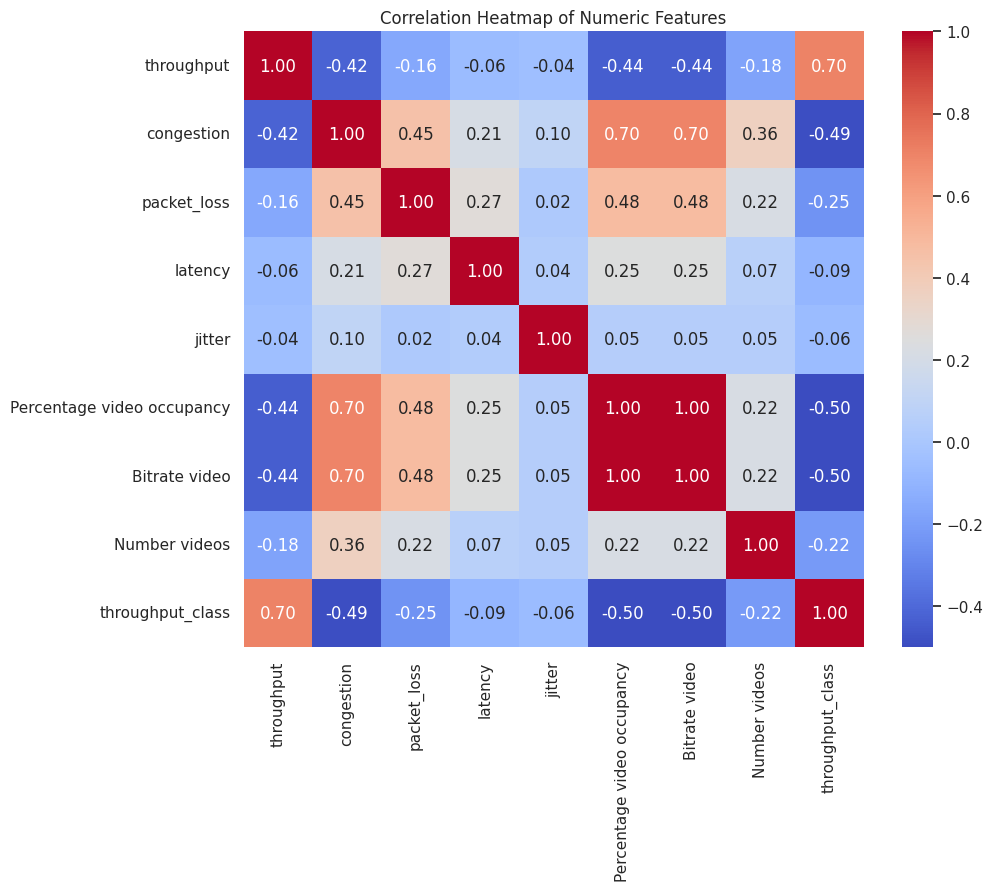

In [ ]:
# Pick just  DataFrame's numerec coluns.
numeric_cols = dfanomolypro.select_dtypes(include=npx.number)

# defined  corelation matrix for  chosen numericel characteristics.
correlation_matrix = numeric_cols.corr()

# Configure  heatmap plot's figure size.
pltx.figure(figsize=(10, 8))

# To see feture correlations, create a heatmap.
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# To provide context, give  heatmap a title.
pltx.title('Correlation Heatmap of Numeric Features')

# present  heatmmap plot.
pltx.show()

# **TSNE visualization**

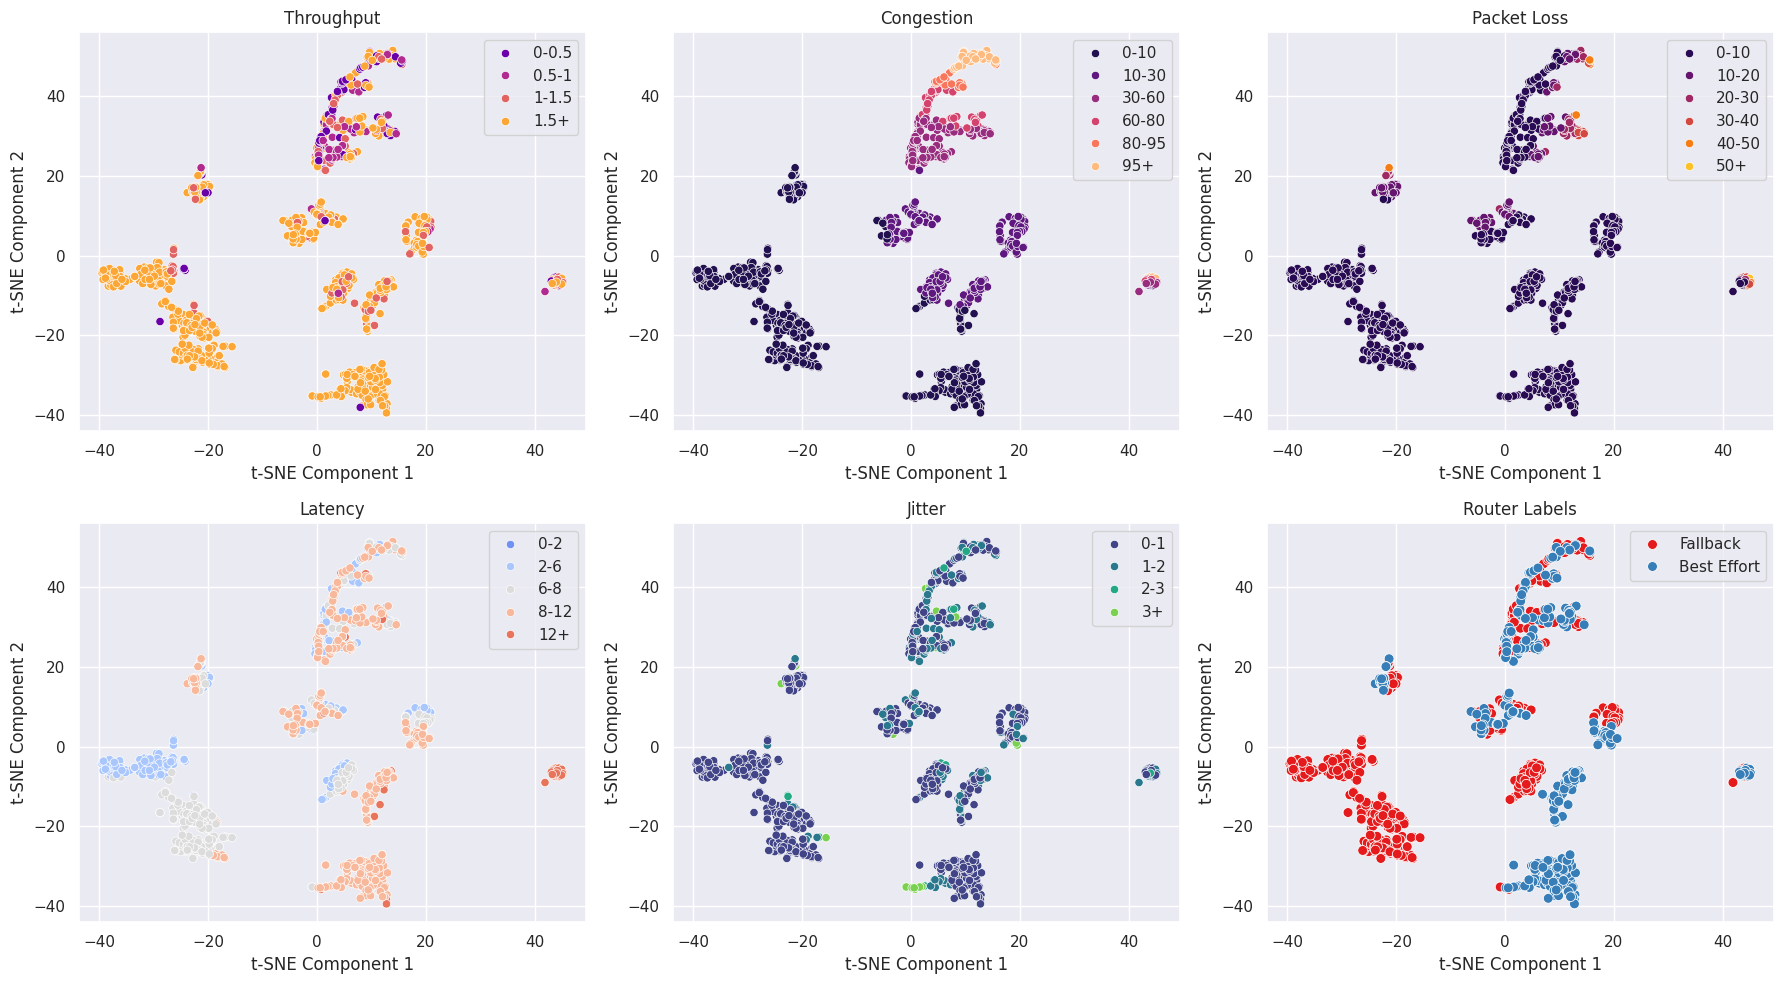

In [ ]:
# Indicate which traits should be part of  t-SNE transformation.
features = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# To prevent changing  original data, make a duplicate of  DataFrame.
dfanomolypro_original = dfanomolypro.copy()

# From  cloned DataFrame, extract  chosen characteristics.
X = dfanomolypro_original[features]

# Reduce  feature space to two dimensions by using t-SNE.
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Put  initial t-SNE element in a fresh column.
dfanomolypro_original['tsne-2d-one'] = tsne_results[:, 0]

# Put  second t-SNE component in a fresh column.
dfanomolypro_original['tsne-2d-two'] = tsne_results[:, 1]

# Make throughput bins for visualisation colouring.
dfanomolypro_original['throughput_bin'] = pdx.cut(
    dfanomolypro_original['throughput'],
    bins=[-npx.inf, 0.5, 1, 1.5, npx.inf],
    labels=["0-0.5", "0.5-1", "1-1.5", "1.5+"]
)

# Congestion bins should be created for visualisation colouring.
dfanomolypro_original['congestion_bin'] = pdx.cut(
    dfanomolypro_original['congestion'],
    bins=[-npx.inf, 10, 30, 60, 80, 95, npx.inf],
    labels=["0-10", "10-30", "30-60", "60-80", "80-95", "95+"]
)

# Construct packet loss bins for visualisation colouring.
dfanomolypro_original['packet_loss_bin'] = pdx.cut(
    dfanomolypro_original['packet_loss'],
    bins=[-npx.inf, 10, 20, 30, 40, 50, npx.inf],
    labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50+"]
)

# Construct delay bins for visualisation colouring.
dfanomolypro_original['latency_bin'] = pdx.cut(
    dfanomolypro_original['latency'],
    bins=[-npx.inf, 2, 6, 8, 12, npx.inf],
    labels=["0-2", "2-6", "6-8", "8-12", "12+"]
)

# Construct jitter bins for visualisation colouring.
dfanomolypro_original['jitter_bin'] = pdx.cut(
    dfanomolypro_original['jitter'],
    bins=[-npx.inf, 1, 2, 3, npx.inf],
    labels=["0-1", "1-2", "2-3", "3+"]
)

# Make router labels more straightforward for easier viewing.
dfanomolypro_original['Routers'] = dfanomolypro_original['Routers'].replace({
    'up xrv1,2,3': 'Best Effort',
    'up xrv6': 'Fallback'
})

# Make  t-SNE projections visible by using a 2x3 subplot arrangement.
fig, axs = pltx.subplots(2, 3, figsize=(18, 10))

# Use Seaborn's style to improve  plot's visual appeal.
sbn.set(style="darkgrid")

# Plot  t-SNE using colour according to  throughput bins.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='throughput_bin',
                data=dfanomolypro_original, ax=axs[0, 0], palette='plasma', legend='full').set_title('Throughput')

# Plot  t-SNE using colour according to  congestion bins.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='congestion_bin',
                data=dfanomolypro_original, ax=axs[0, 1], palette='magma', legend='full').set_title('Congestion')

# Color-plot  t-SNE according to  packet loss bins.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='packet_loss_bin',
                data=dfanomolypro_original, ax=axs[0, 2], palette='inferno', legend='full').set_title('Packet Loss')

# Use colour to plot t-SNE according to latency bins.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='latency_bin',
                data=dfanomolypro_original, ax=axs[1, 0], palette='coolwarm', legend='full').set_title('Latency')

# Using jitter bins, plot  t-SNE with colour.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='jitter_bin',
                data=dfanomolypro_original, ax=axs[1, 1], palette='viridis', legend='full').set_title('Jitter')

# Based on  types of routers, plot  t-SNE using colour.
sbn.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='Routers',
                data=dfanomolypro_original, ax=axs[1, 2], palette='Set1', legend='full', s=50).set_title('Router Labels')

# Make layout adjustments to prevent subplot overlaps.
pltx.tight_layout()

# Make sure every subplot has axis labels and legends.
for ax in axs.flat:
    ax.set(xlabel='t-SNE Component 1', ylabel='t-SNE Component 2')
    ax.legend(loc='best')

# For improved spacing, use  tight layout once again.
pltx.tight_layout()

# print  output
pltx.show()

# **Jitter Comparision best effort vs fallback route**

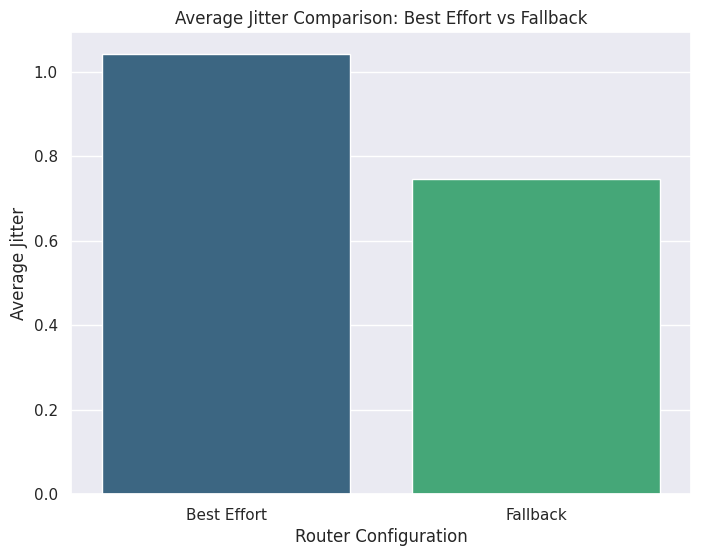

In [ ]:
# Collect  data according to 'Routers' and calculate  average jitter for each group.
jitter_comparison = dfanomolypro_original.groupby('Routers')['jitter'].mean().reset_index()

# Set up a new figure with  given dimensions for  bar plot.
pltx.figure(figsize=(8, 6))

# To compare average jitter values among router kinds, make a bar plott.
sbn.barplot(x='Routers', y='jitter', data=jitter_comparison, palette='viridis')

# For context, give  pub storyline a title.
pltx.title('Average Jitter Comparison: Best Effort vs Fallback')

# To show several router settings, label  xaxis.
pltx.xlabel('Router Configuration')

# Write  average jitter values on  yaxis.
pltx.ylabel('Average Jitter')

# Render and show  bar graph.
pltx.show()

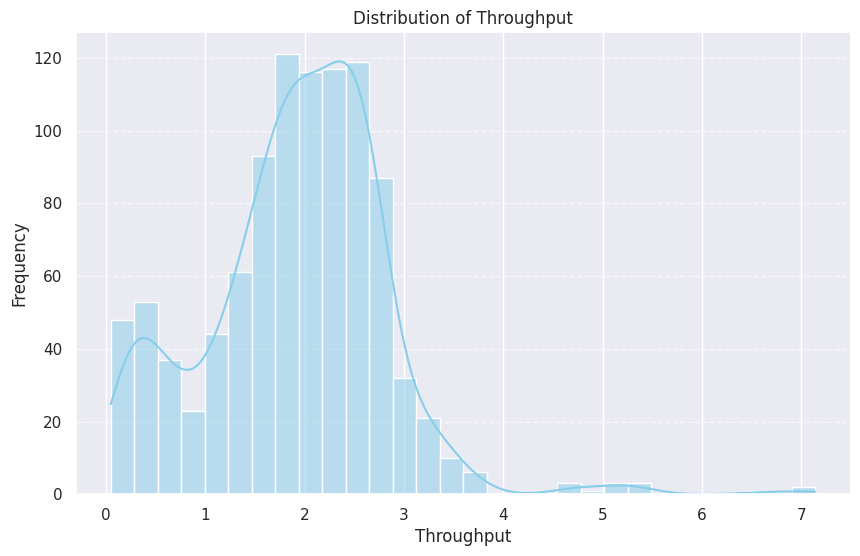

In [ ]:
# Make a new histogram fig with  desired size.
pltx.figure(figsize=(10, 6))

# Plot  'throughput' column histogram using a KDE curve, 30 bins, and skyblue colour.
sbn.histplot(data=dfanomolypro_original, x='throughput', kde=True, bins=30, color='skyblue')

# Set  histogram plot's title.
pltx.title('Distribution of Throughput')

# Indicate throughput values by labeling  xaxis.
pltx.xlabel('Throughput')

# Indicate frequency counts by labeling  yaxis.
pltx.ylabel('Frequency')

# To make frequeeency numbers easier to read, add a horizontal grid.
pltx.grid(axis='y', linestyle='--', alpha=0.7)

# Show  histogram plot.
pltx.show()

# **Change Point Detection (Using Ruptures)**

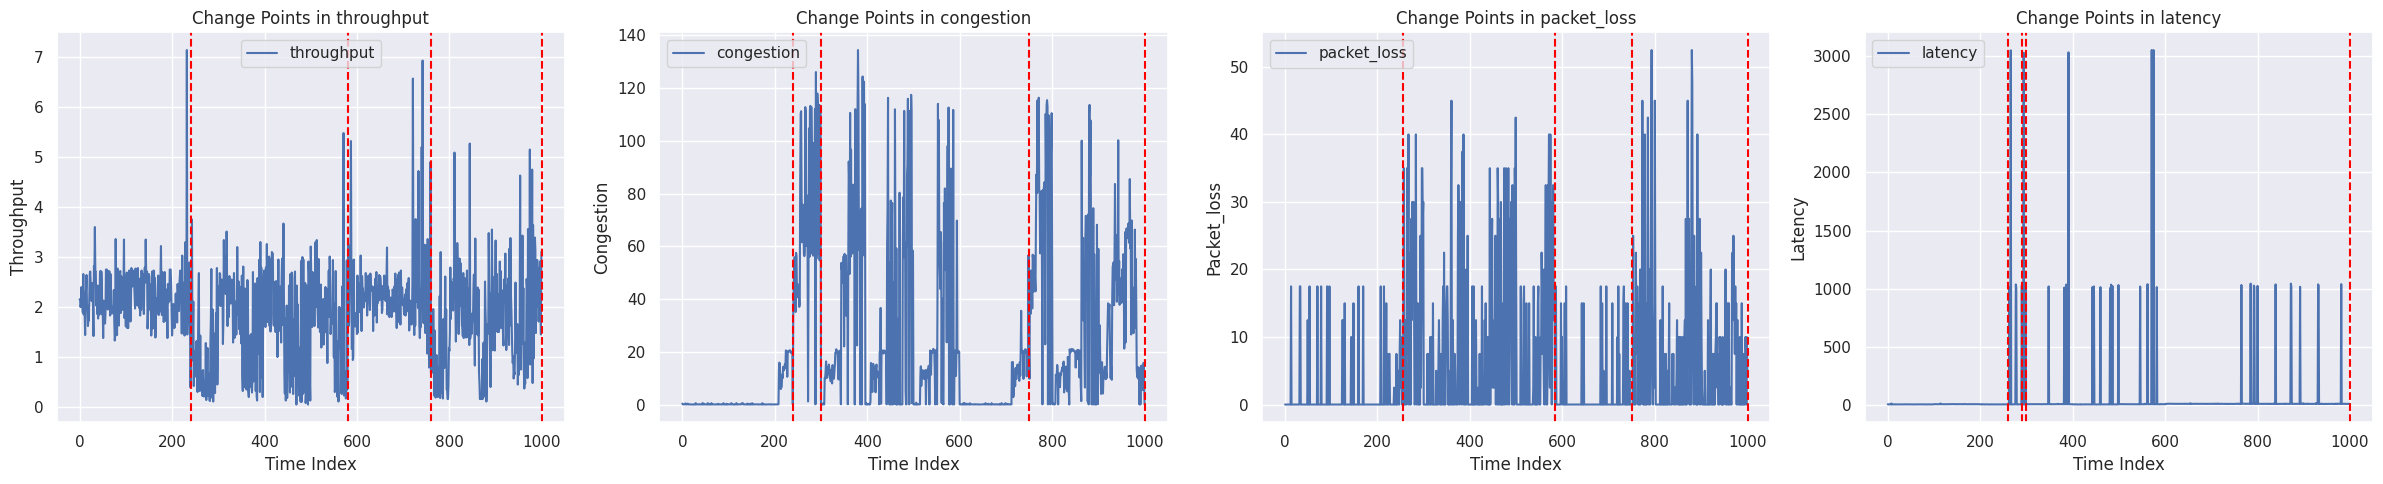

In [ ]:
# To preserve  original data, make a duplicate of  DataFrame.
dfanomolypro_original = dfanomolypro.copy()

# Create a function that uses  Dynamic Programming (Dynp) approach to identify change points in a given time series based on ruptures.
def detect_change_points(series, model="l2", n_bkps=3):
    algo = rpt.Dynp(model=model).fit(series)
    result = algo.predict(n_bkps=n_bkps)
    return result

# Indicate which network performance indicators should be examined for turning moments.
metrics = ['throughput', 'congestion', 'packet_loss', 'latency']

# Make a subplot layout with one row and four columns to show  change points for each measure.
fig, axs = pltx.subplots(1, 4, figsize=(24, 5))  # Horizontal layout

# Plot change points by iterating over each statistic.
for i, metric in enumerate(metrics):

    # Take  time series data for  metric out of  original DataFrame.
    series = dfanomolypro_original[metric].values

    # Find points of change in  time series of  current metric.
    cp = detect_change_points(series)

    # Plot  current metric's time series.
    axs[i].plot(series, label=metric)

    # To show identified change points, overlay vertical lines on  plot.
    for bkpt in cp:
        axs[i].axvline(bkpt, color='red', linestyle='--')

    # Indicate which metric is being examined in  subplot's title.
    axs[i].set_title(f"Change Points in {metric}")
    axs[i].set_xlabel("Time Index")
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()

# customize subplot layout to prevent overlapping elements.
pltx.tight_layout()

# present  plott showing change point detection for all metrics.
pltx.show()

# **Extended isolation forest**

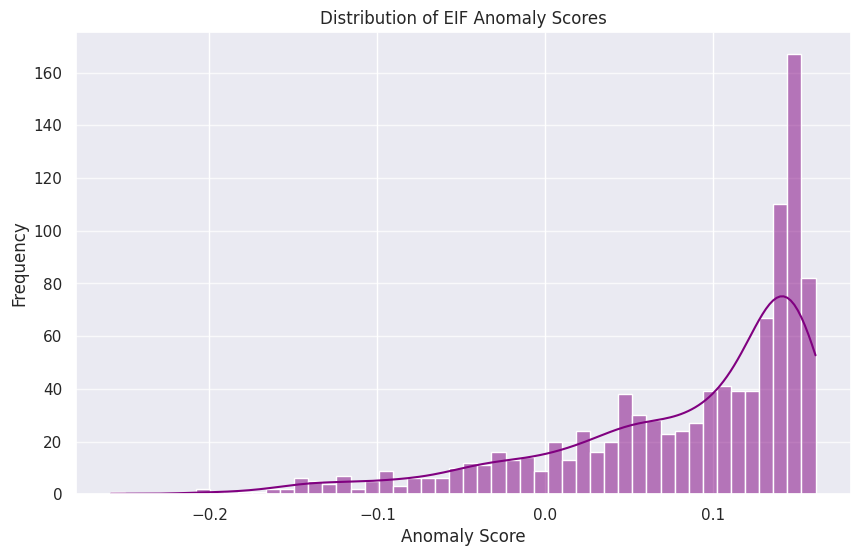

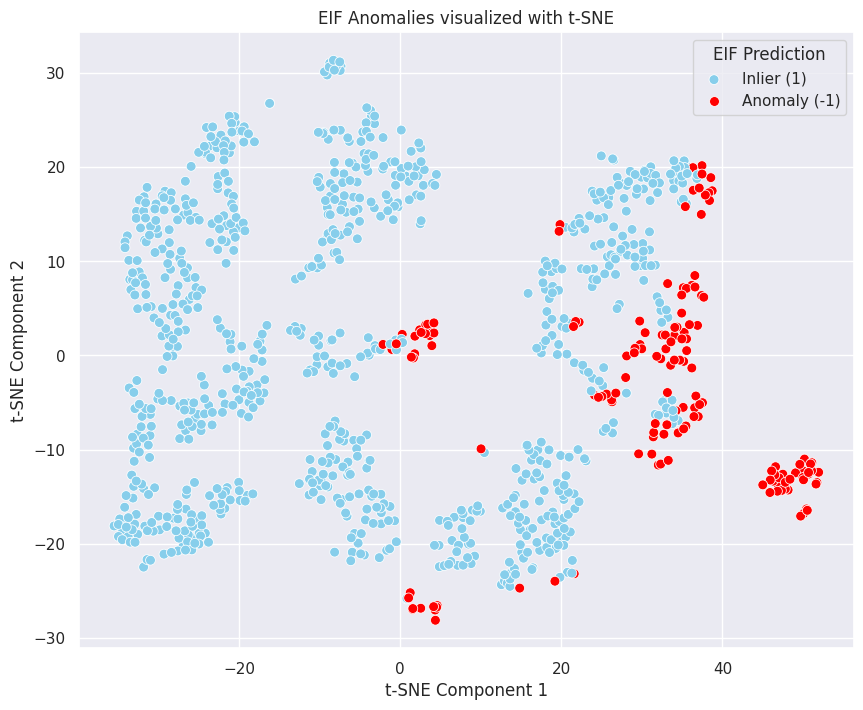

In [ ]:
# Choose  appropriate characteristics for detecting anomalies, leaving out  target variable.
features_for_eif = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# Take  feature subset from  DataFrame once it has been cleaned.
X_eif = dfanomolypro[features_for_eif]

# To standardise  feature values, initialise a standard scaler.
scaler_eif = StandardScaler()

# Scale feature data by fitting t
X_scaled_eif = scaler_eif.fit_transform(X_eif)

# Set  settings for  Extended Isolation Forest during initialisation.
eif = IsolationForest(n_estimators=100, contamination='auto', random_state=42, max_features=len(features_for_eif))

# Apply scaled feature data to  Isolation Forest model.
eif.fit(X_scaled_eif)

# Calculate anomaly scores for every occurrence; larger anomaly corresponds to a lower score.
anomaly_scores = eif.decision_function(X_scaled_eif)

# Ascertain if each case is an abnormality (1 = inlier, -1 = outlier).
predictions = eif.predict(X_scaled_eif)

# Include in  DataFrame  calculated anomaly scores.
dfanomolypro['eif_anomaly_score'] = anomaly_scores

# Include  DataFrame's anomaly predictions.
dfanomolypro['eif_prediction'] = predictions

# Make a histogram to see how anomaly scores are distributed.
pltx.figure(figsize=(10, 6))
sbn.histplot(dfanomolypro['eif_anomaly_score'], kde=True, bins=50, color='purple')

# To provide context, add a title to  histogram.
pltx.title('Distribution of EIF Anomaly Scores')

# Put "Anomaly Score" on  x axis.
pltx.xlabel('Anomaly Score')

# Put "Frequency" on  y axis.
pltx.ylabel('Frequency')

# For readability, add a horizontal grid to  y axis.
pltx.grid(axis='y', alpha=0.75)

# Show  histogram plot.
pltx.show()

# Set up t-SNE to decrease dimensionality to two components.
tsne_eif = TSNE(n_components=2, random_state=42)

# Use t-SNE to fit and alter  scaled features.
tsne_results_eif = tsne_eif.fit_transform(X_scaled_eif)

# Insert  first t-SNE component into a new DataFrame column.
dfanomolypro['tsne-2d-one_eif'] = tsne_results_eif[:, 0]

# Put  second t-SNE component in a fresh column.
dfanomolypro['tsne-2d-two_eif'] = tsne_results_eif[:, 1]

# Create an EIF anomaly forecast-colored scatter plot of the t-SNE components.
pltx.figure(figsize=(10, 8))
sbn.scatterplot(
    x='tsne-2d-one_eif',
    y='tsne-2d-two_eif',
    hue='eif_prediction',
    data=dfanomolypro,
    palette={1: 'skyblue', -1: 'red'},
    legend='full',
    s=50
)

# Title  t-SNE plot.
pltx.title('EIF Anomalies visualized with t-SNE')

# Put  first tSNE component on  xaxis.
pltx.xlabel('t-SNE Component 1')

# Put  second tSNE component on  yaxis label.
pltx.ylabel('t-SNE Component 2')

# Include a caption that explains  colour-coded EIF forecasts.
pltx.legend(title='EIF Prediction', labels=['Inlier (1)', 'Anomaly (-1)'])

# Display  finished t-SNE visualisation plot.
pltx.show()

# **Time series forecasting using SARIMA**

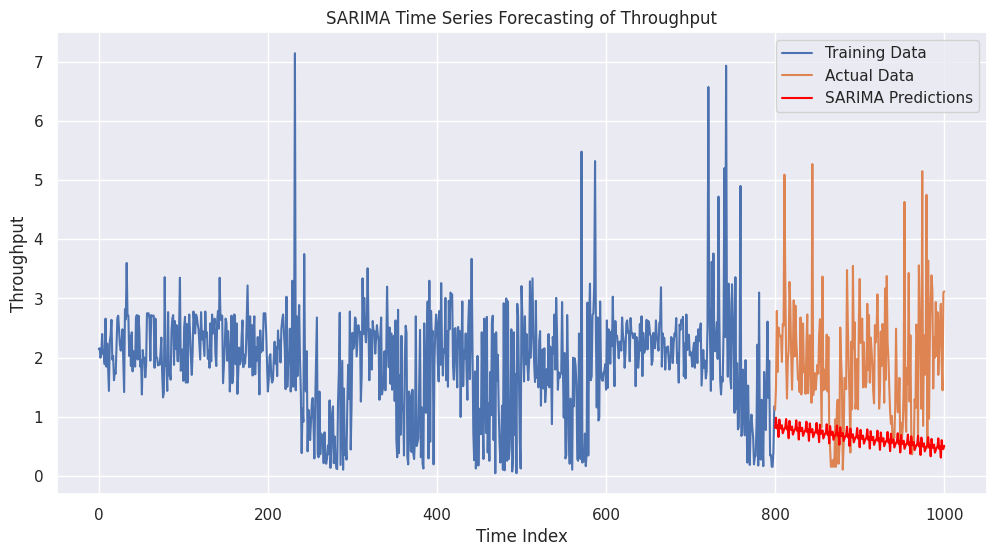

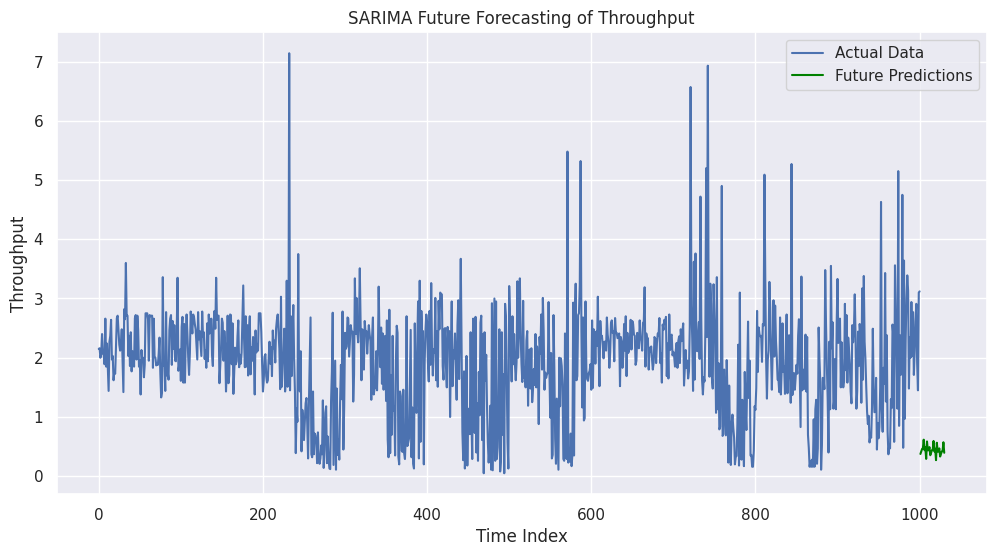

In [ ]:
# Choose  target time series for forecasting to be  'throughput' column.
throughput_series = dfanomolypro['throughput']

# Divide  time series into two sets: 80% for training and 20% test
train_size = int(len(throughput_series) * 0.8)
train_data, test_data = throughput_series[0:train_size], throughput_series[train_size:]

# Indicate the non-seasonal order (p, d, q) for the ARIMA model.
order = (1, 1, 1)

# For  sarima model, define  seasonal order (P, D, Q, s) where s is  seasonal period, for example, 12.
seasonal_order = (1, 1, 1, 12)
# Align training data with SARIMA.
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Make predictions on the test data using the fitted model.
predictions = results.predict(start=len(train_data), end=len(throughput_series)-1)

# Make a plot to show SARIMA forecasts, real test data, and training data.
pltx.figure(figsize=(12, 6))
pltx.plot(train_data.index, train_data, label='Training Data')
pltx.plot(test_data.index, test_data, label='Actual Data')
pltx.plot(predictions.index, predictions, label='SARIMA Predictions', color='red')

# Configure  plot title for  forecasted results of  SARIMA test.
pltx.title('SARIMA Time Series Forecasting of Throughput')

# Put  time index on  x axis.
pltx.xlabel('Time Index')

# Indicate  throughput value on  y axis.
pltx.ylabel('Throughput')

# Show  storyline with  legend.
pltx.legend()
pltx.show()

# Indicate  number of future time steps that will be forecasted beyond  current data.
forecast_horizon = 30  # Example: Forecast 30 future time steps

# Using  fitted model, create future forecasts based on SARIMA.
future_predictions = results.predict(start=len(throughput_series), end=len(throughput_series) + forecast_horizon - 1)

# To visualise current data and projected values for  future, create a plot.
pltx.figure(figsize=(12, 6))
pltx.plot(throughput_series.index, throughput_series, label='Actual Data')
pltx.plot(future_predictions.index, future_predictions, label='Future Predictions', color='green')

# Assign  SARIMA future forecasting plot title.
pltx.title('SARIMA Future Forecasting of Throughput')

# Indicate  time index on  x axis.
pltx.xlabel('Time Index')

# Put throughput values on  y axis.
pltx.ylabel('Throughput')

# Show  plot of future forecasts with a legend.
pltx.legend()
pltx.show()

# **Scatter plot of residuals vs  levarage**

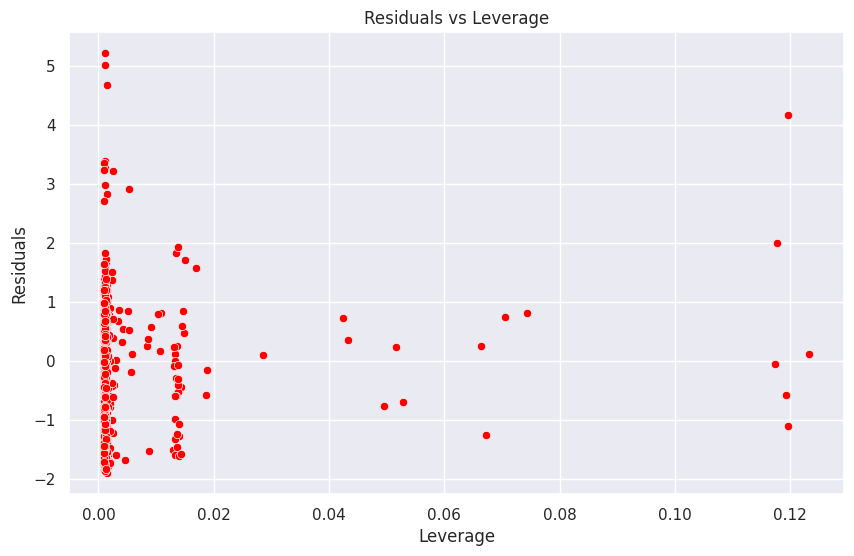

In [ ]:
# Specify the regression model's characteristics and target variable.
features_for_regression = ['latency', 'jitter']
target_for_regression = 'throughput'



# Verify that the DataFrame contains the target and feature columns.
if target_for_regression in dfanomolypro.columns and all(f in dfanomolypro.columns for f in features_for_regression):

    # Take the DataFrame and extract the feature matrix (X).
    X_reg = dfanomolypro[features_for_regression]

    # Take the DataFrame and extract the target variable (y).
    y_true = dfanomolypro[target_for_regression]

   # Add a constant term to features to include an intercept in the model.
    X_reg = sm.add_constant(X_reg)

    # Use Ordinary Least Squares (OLS) to construct and fit a regression model.
    model_reg = sm.OLS(y_true, X_reg)
    results_reg = model_reg.fit()

   # Predict the target variable using the fitted model (shown with the same data).
    y_pred = results_reg.predict(X_reg)

    # defined the residuals, or the variation between the actual and expected values.
    residuals = y_true - y_pred

    # To evaluate impact and outliers, create the Residuals vs. Leverage graphic.
    # Use model influence diagnostics to calculate Cook's distance and leverage (hat values).
    influence = results_reg.get_influence()
    leverage = influence.hat_matrix_diag
    cooks_distance = influence.cooks_distance[0]

    # Make a scatter plot showing the values of leverage vs residuals.
    pltx.figure(figsize=(10, 6))
    sbn.scatterplot(x=leverage, y=residuals, color='red')

    # Decide on a title for the plot of residuals versus leverage.
    pltx.title('Residuals vs Leverage')

    # Indicate leverage on the x axis.
    pltx.xlabel('Leverage')

    # Put Residuals on the y axis.
    pltx.ylabel('Residuals')

    # To make the story easier to follow, provide a grid.
    pltx.grid(True)
# Display the residuals plotted versus leverage.
    pltx.show()

# Print a warning message if the necessary columns are not present.
else:
    print("Target or features for regression not found in the DataFrame.")

    # To debug, print the information from the missing column or columns.
    print(f"Ensure '{target_for_regression}' and {features_for_regression} are columns in your dfanomolypro.")

# Scale-Location Plot: Visualizing Homoscedasticity in Model Residuals

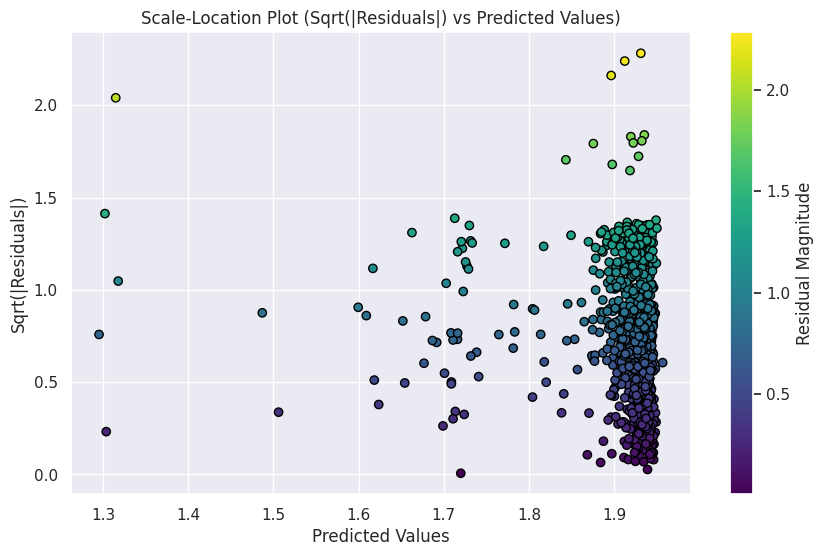

In [ ]:
# defined  absolute residuals' square root to perform a homoscedasticity check.
sqrt_residuals = np.sqrt(np.abs(residuals))

# To plot  Scale-Location graph, make an illustration.
pltx.figure(figsize=(10, 6))

# Make a scatter plot with  expected values against  residuals' squared, coloured by  residual magnitude.
scatter = pltx.scatter(y_pred, sqrt_residuals, c=sqrt_residuals, cmap='viridis', edgecolors='black')

# Use an eye-catching colour scheme to show any remaining intensity.

# To make scatter points more visible, add black borders.

# Give  Scale-Location plot an interesting title.
pltx.title('Scale-Location Plot (Sqrt(|Residuals|) vs Predicted Values)')

# Indicate which x axis represents  regression model's expected values.
pltx.xlabel('Predicted Values')

# Display the yaxis's square root of the absolute residuals.
pltx.ylabel('Sqrt(|Residuals|)')

# To improve  plot's legibility, include a grid.
pltx.grid(True)

# Open  object that maps colours to  scatter points.
cbar = pltx.colorbar(scatter)

# To show  residual magnitude, add a colorbar to  graphic.
cbar.set_label('Residual Magnitude')

# Present  completed scale-location plot.
pltx.show()

# **Distribution plot of anomoly percentage**

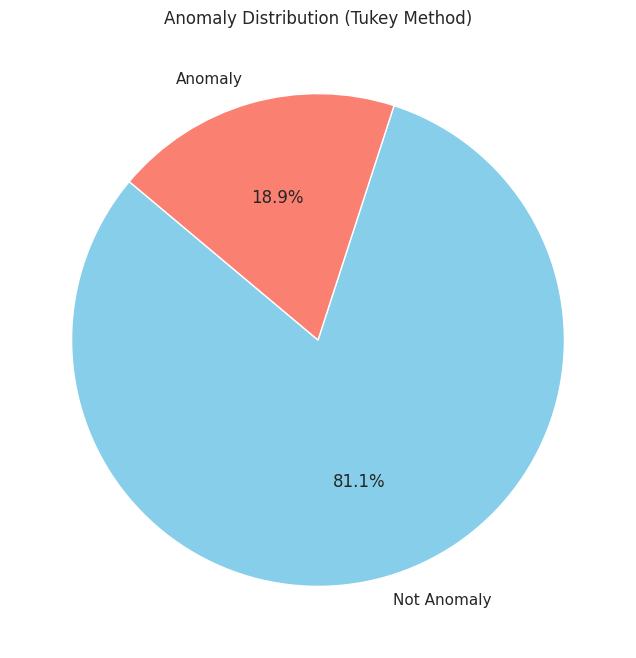

In [ ]:
#To find outliers in a given column, write a function that applies Tukey's fences method.
def apply_tukey(dfanomolypro, column):

    # defined  supplied column's first quartile (Q1).
    Q1 = dfanomolypro[column].quantile(0.25)

    # defined  supplied column's third quartile (Q3).
    Q3 = dfanomolypro[column].quantile(0.75)

    # defined  interquartile range (IQR).
    IQR = Q3 - Q1

   #The lower limit for non-outlier values may be obtained by applying Tukey's rule.
    lower_bound = Q1 - 1.5 * IQR

    # Apply Tukey's rule to get  upper bound for non-outlier values.
    upper_bound = Q3 + 1.5 * IQR

    # Indicate anomalies by marking values beyond  lower and higher boundaries (1 = abnormality, 0 = normal).
    dfanomolypro[f'{column}_anomaly_tukey'] = ((dfanomolypro[column] < lower_bound) | (dfanomolypro[column] > upper_bound)).astype(int)

    # Provide  modified DataFrame with  anomalous flag column back.
    return dfanomolypro

# A list of measures for anomaly identification using Tukey's approach
metrics = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# Apply each measure in  list to  Tukey anomaly detection algorithm.
for metric in metrics:
    dfanomolypro = apply_tukey(dfanomolypro, metric)

# Put all  anomaly flags in one column and label  row as anomalous if any of  metrics are abnormal.
dfanomolypro['total_anomaly_tukey'] = dfanomolypro[[f'{m}_anomaly_tukey' for m in metrics]].max(axis=1)

# defined how many normal points and anomalies re are for visualisation.
anomaly_counts_tukey = dfanomolypro['total_anomaly_tukey'].value_counts()

# To see  percentage of anomalies compared to normal data points.
pltx.figure(figsize=(8, 8))

# Configure  pie chart's labels, percentage display, and design.
pltx.pie(anomaly_counts_tukey, labels=['Not Anomaly', 'Anomaly'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])

# Give  pie chart a title.
pltx.title('Anomaly Distribution (Tukey Method)')

# Show  Tukey-based anomaly distribution pie graphic.
pltx.show()

# **checking outliers**

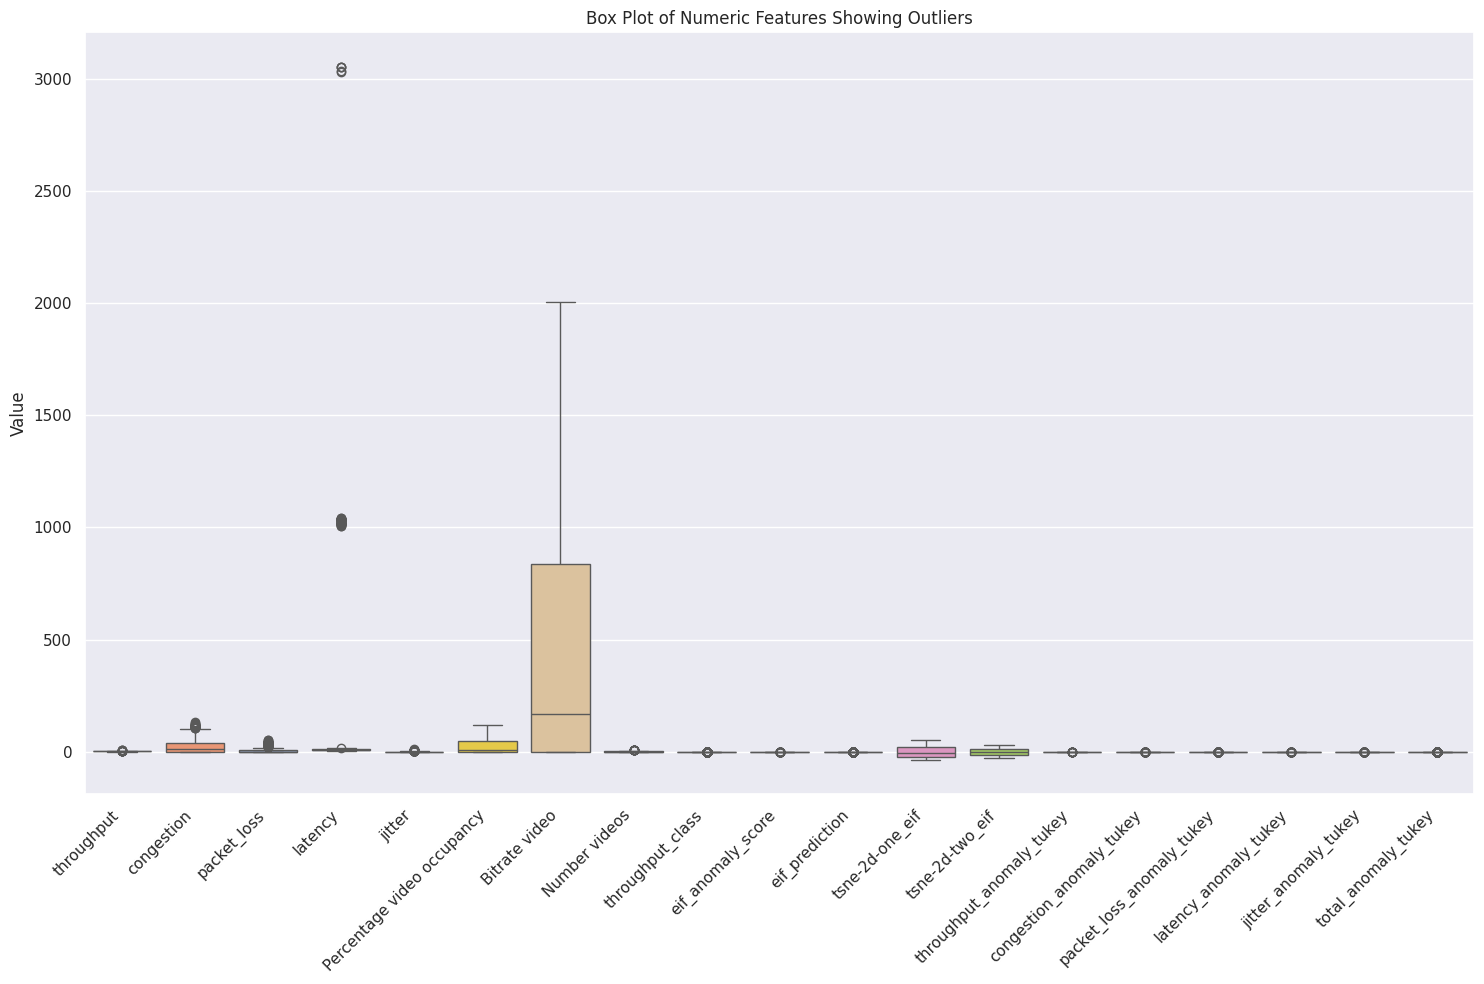

In [ ]:
# To visualise, select all of  DataFrame's numericals colummns.
numeric_cols = dfanomolypro.select_dtypes(include=npx.number)

# For  box plots, make a new figures with  appropriate measurements.
pltx.figure(figsize=(15, 10))

# Create box plots to see distributions and identify outliers for every numerical column.
sbn.boxplot(data=numeric_cols, orient="v", palette="Set2")

# Set  box plot chart's title for context.
pltx.title('Box Plot of Numeric Features Showing Outliers')

# To show  scale of feature values, label  y axis.
pltx.ylabel('Value')

# To make x axis tick labels easier to read, rotate m.
pltx.xticks(rotation=45, ha='right')

# Auto-modify subplot settings to conform to  figure area.
pltx.tight_layout()

# Present  box plot.
pltx.show()


# **Applied pre processing**


# **Handling outlier**

Outliers have been handled by filling with  median for  following columns:
['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']


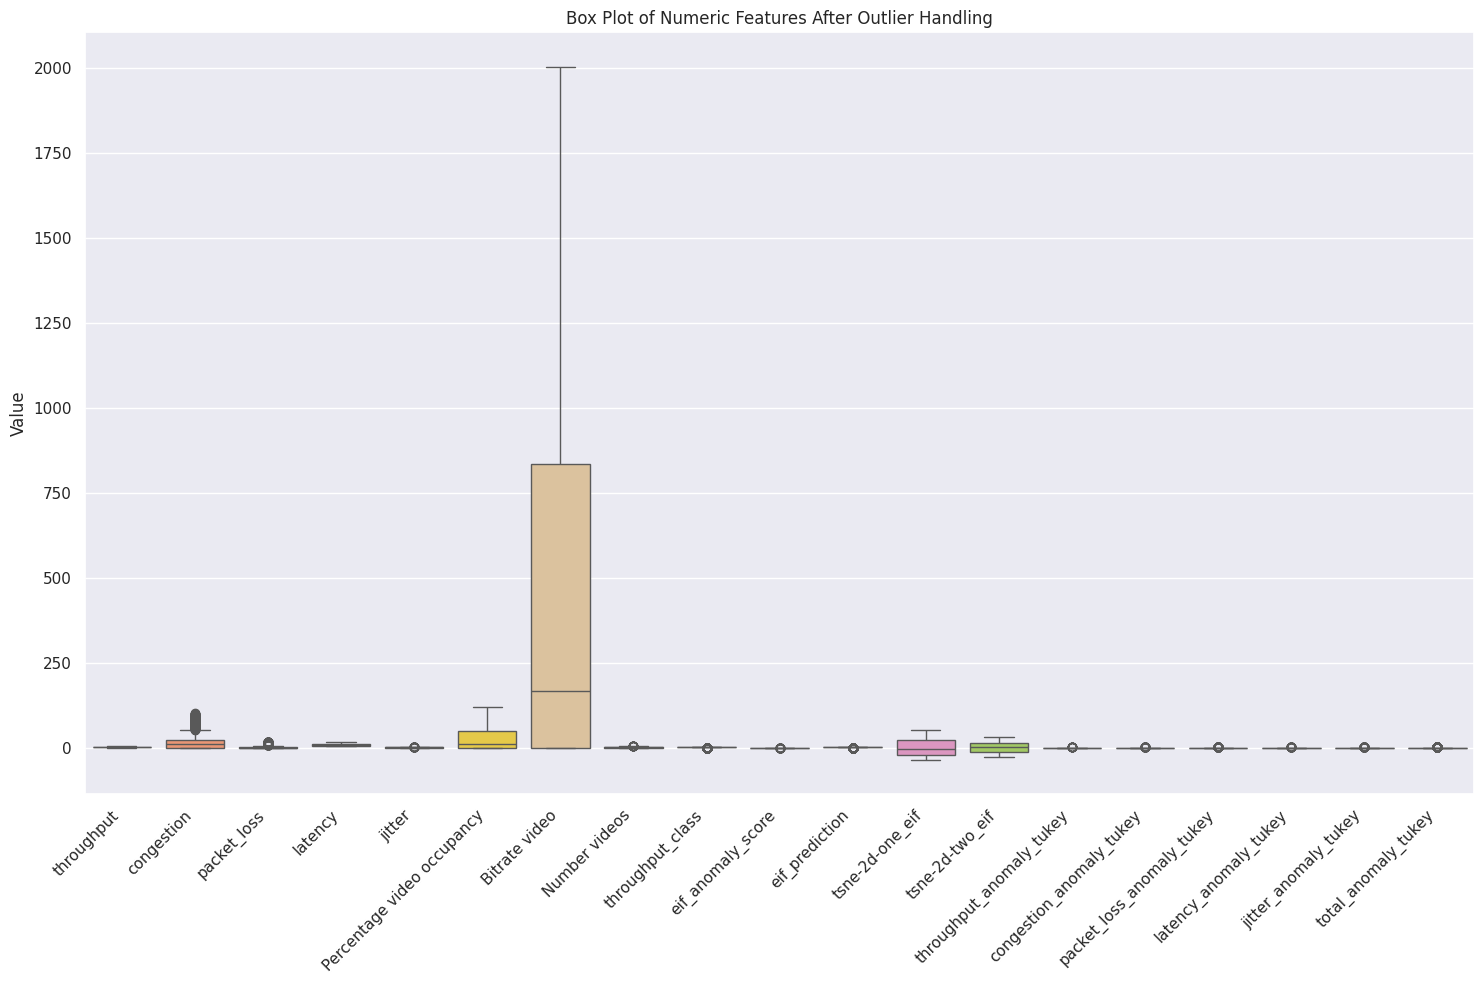

In [ ]:
# Use  IQR technique to define a function to deal with outliers in a particular column.
def handle_outliers_iqr(dfanomolypro, column):

    # defined  column in question's first quartile (Q1)
    Q1 = dfanomolypro[column].quantile(0.25)

    # defined which column's third quartile (Q3) is present.
    Q3 = dfanomolypro[column].quantile(0.75)

    #  interquartile range (IQR) should be calculated.
    IQR = Q3 - Q1

    # Define the lower bound for the identification of outliers using Tukey's rule.
    lower_bound = Q1 - 1.5 * IQR

    # Establish  upper limit for Tukey's rule outlier detection.
    upper_bound = Q3 + 1.5 * IQR

    # Find  rows' indices that have values that are outliers, or beyond  IQR boundaries.
    outlier_indices = dfanomolypro[(dfanomolypro[column] < lower_bound) | (dfanomolypro[column] > upper_bound)].index

    # defined  column median to be used in place of outliers.
    median_value = dfanomolypro[column].median()

    # Use  median value in place of  outlier numbers.
    dfanomolypro.loc[outlier_indices, column] = median_value

    # Once  column's outliers have been handled, return  DataFrame.
    return dfanomolypro

# Indicate which numerical columns should be examined and outliers addressed.
columns_to_check = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# Use  outlier management function for every list column.
for col in columns_to_check:
    dfanomolypro = handle_outliers_iqr(dfanomolypro, col)

# Print a confirmation confirming  handling of outliers.
print("Outliers have been handled by filling with  median for  following columns:")

# Output  list of processed columns.
print(columns_to_check)

# To confirm  impact of outlier treatment, select all numerical columns once again.
numeric_cols_after = dfanomolypro.select_dtypes(include=npx.number)

# Make a new figure for  box plots that have been updated.
pltx.figure(figsize=(15, 10))

# To confirm modifications, create box plots of numerical features after replacing outliers.
sbn.boxplot(data=numeric_cols_after, orient="v", palette="Set2")

# Decide on  new box plot chart's title.
pltx.title('Box Plot of Numeric Features After Outlier Handling')

# Indicate numeric values by labelling  y axis.
pltx.ylabel('Value')

# Rotate the x axis labels to make them easier to read.
pltx.xticks(rotation=45, ha='right')

# Modify  layout to avoid labels and titles being clipped.
pltx.tight_layout()

# Present  box plot that has been updated.
pltx.show()


# **label encoding**

In [ ]:
# Set up  LabelEncoder instance.
le = LabelEncoder()

#  The categorisation column for "Routers" needs to be converted into numerical labels.
dfanomolypro['Routers'] = le.fit_transform(dfanomolypro['Routers'])

#It is necessary to encode the 'Planned route' category column into numeric labels.
dfanomolypro['Planned route'] = le.fit_transform(dfanomolypro['Planned route'])

# Numerical labels should be encoded into the 'Network target' categories column.
dfanomolypro['Network target'] = le.fit_transform(dfanomolypro['Network target'])

# To confirm  label encoding, show  revised DataFrame's first few rows.
dfanomolypro.head()


,throughput,congestion,packet_loss,latency,jitter,Routers,Planned route,Network target,Video target,Percentage video occupancy,...,eif_anomaly_score,eif_prediction,tsne-2d-one_eif,tsne-2d-two_eif,throughput_anomaly_tukey,congestion_anomaly_tukey,packet_loss_anomaly_tukey,latency_anomaly_tukey,jitter_anomaly_tukey,total_anomaly_tukey
0,2.15,0.38,0.0,6.58,0.52,1,0,0,NaN,0,...,0.152427,1,-28.488298,4.280148,0,0,0,0,0,0
1,2.16,0.12,0.0,5.36,0.34,1,0,0,NaN,0,...,0.142066,1,-33.424454,7.001588,0,0,0,0,0,0
2,2.00,0.08,0.0,6.29,0.23,1,0,0,NaN,0,...,0.142408,1,-33.863220,12.718569,0,0,0,0,0,0
3,2.07,0.07,0.0,5.91,0.51,1,0,0,NaN,0,...,0.153611,1,-27.560894,7.426026,0,0,0,0,0,0
4,2.40,0.08,0.0,5.81,0.71,1,0,0,NaN,0,...,0.154098,1,-21.741680,-5.148125,0,0,0,0,0,0


# **target variable**

In [ ]:
# Convert all of  DataFrame's numeric column names to a list.
numeric_cols = dfanomolypro.select_dtypes(include=npx.number).columns.tolist()

# Take  target variable 'throughput' off of  predictor database.
numeric_cols.remove('throughput')

# Use  remaining numeric columns to create  feature matrix X.
X = dfanomolypro[numeric_cols]

# Assign  'throughput' column to  goal vector y.
y = dfanomolypro['throughput']


# **Feature selection by PCA**

In [ ]:
# Decide how many primary components  PCA transformation will keep.
n_components = 10

# Set  PCA model's initial component count to  specified value.
pca = PCA(n_components=n_components)

# To reduce dimensionality, convert  data and fit PCA to  feature matrix.
X_pca = pca.fit_transform(X)

# To store  resultant primary components, create a new DataFrame.
dfanomolypro_pca = pdx.DataFrame(data=X_pca, columns=[f'pca_component_{i+1}' for i in range(n_components)])

# To enable additional analysis or visualisation, include  original target class ('throughput_class') back into  PCA DataFrame.
dfanomolypro_pca['throughput_class'] = dfanomolypro['throughput_class']

# Output  percentage of variation that each primary component accounts for.
print("Explained variance ratio by component:")
print(pca.explained_variance_ratio_)

# Output  total variance that each of  chosen primary components explains.
print(f"Total explained variance by {n_components} components: {npx.sum(pca.explained_variance_ratio_):.4f}")


Explained variance ratio by component:
[9.97283529e-01 1.63700598e-03 6.55385282e-04 3.61576644e-04
 4.59262973e-05 1.18430328e-05 2.36549211e-06 9.96826984e-07
 3.46929052e-07 2.27531870e-07]
Total explained variance by 10 components: 1.0000


# **Spliting  dataset into train and test**

In [ ]:
# spliting a data
Xtrainclassanomoly, Xtestclassanomoly, ytrainclassanomoly, ytestclassanomoly = train_test_split(X_pca, dfanomolypro_pca['throughput_class'], test_size=0.2, random_state=42)

# **Apply standerscaler**

In [ ]:
# To normalise  data, initialise  StandardScaler.
scaler = StandardScaler()

# Apply  scaler to  training data to make it unit variance and zero mean.
X_train_scaled = scaler.fit_transform(Xtrainclassanomoly)

# Use  same scaler that was fitted to  training data to transform  test data.
X_test_scaled = scaler.transform(Xtestclassanomoly)


# **model 1 gradiant boost**

In [ ]:
# Set  GB Classifier's initial settings as follows:
gbclassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Use  training data to train  Gb model.
gbclassifier.fit(Xtrainclassanomoly, ytrainclassanomoly)


GradientBoostingClassifier(random_state=42)

# **Training result**


Gradient Boosting Classifier Evaluation:
Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       679

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



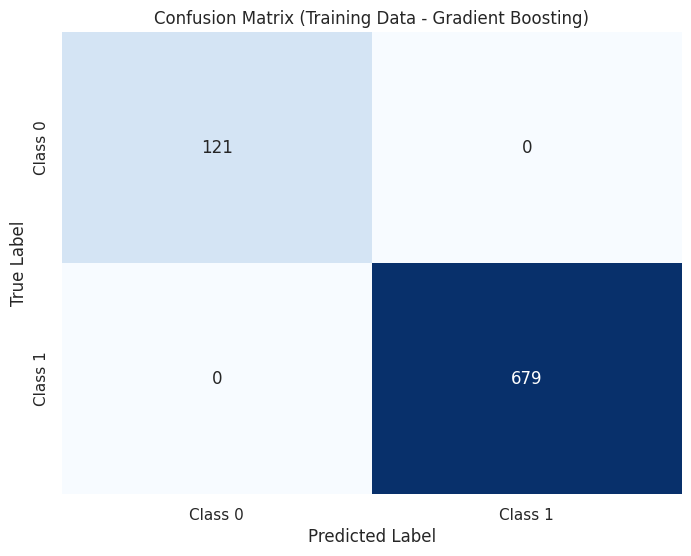

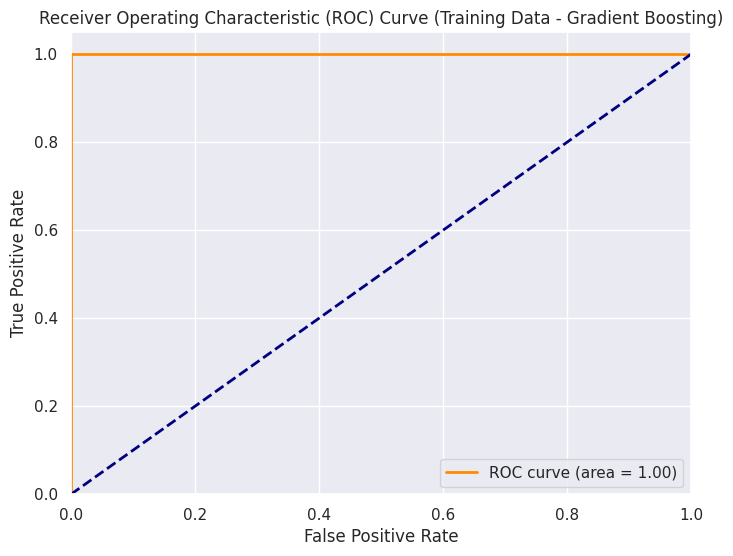

In [ ]:
# Use  learnt Gradient Boosting model to make predictions on  training set.
y_pred_gb = gbclassifier.predict(Xtrainclassanomoly)

# Print  section header for  evaluation.
print("\nGradient Boosting Classifier Evaluation:")

# defined  model's accuracy score using  training data and print it out.
print("Accuracy:", accuracy_score(ytrainclassanomoly, y_pred_gb))

# defined  accuracy score, which is  percentage of genuine positives among all anticipated positives.
precisiontest = precision_score(ytrainclassanomoly, y_pred_gb)

# defined  recall score, which is  percentage of genuine positives among all positives.
recalltest = recall_score(ytrainclassanomoly, y_pred_gb)

# defined  F1 score by taking  harmonic mean of recall and accuracy.
f1test = f1_score(ytrainclassanomoly, y_pred_gb)

# Print  accuracy score that was definedd.
print("Test Precision:", precisiontest)

# Print  recall score that was definedd.
print("Test Recall:", recalltest)

# Print  F1 score that was definedd.
print("Test F1 Score:", f1test)

# Print a thorough classification report that includes support, F1-score, recall, and accuracy.
print("\nClassification Report:")
print(classification_report(ytrainclassanomoly, y_pred_gb))

# Produce predictions for  confusion matrix and ROC analysis using  training set.
ypredgbtrain = gbclassifier.predict(Xtrainclassanomoly)

# Using  training data, obtain  expected probability scores for  positive class.
yprobagbtrain = gbclassifier.predict_proba(Xtrainclassanomoly)[:, 1]

# Using  training predictions, create a confusion matrix.
cm_train = confusion_matrix(ytrainclassanomoly, ypredgbtrain)

# To visualise  confusion matrix, make a heatmap.
pltx.figure(figsize=(8, 6))
sbn.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Put  anticipated class labels on  x axis.
pltx.xlabel('Predicted Label')

# Put real class labels on  y axis.
pltx.ylabel('True Label')

# Assign  confusion matrix graphic a title.
pltx.title('Confusion Matrix (Training Data - Gradient Boosting)')

# Show  heatmap for  confusion matrix.
pltx.show()

# defined  ROC curve's true positive and false positive rates.
fpr_train, tpr_train, _ = roc_curve(ytrainclassanomoly, yprobagbtrain)

# defined  ROC's Area Under  Curve (AUC)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot  model performance using  ROC curve.
pltx.figure(figsize=(8, 6))
pltx.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')

# Draw a reference diagonal line that depicts performance at random.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establish  ROC plot's x axis bounds.
pltx.xlim([0.0, 1.0])

# Establish  ROC plot's y axis limitations.
pltx.ylim([0.0, 1.05])

# Put False Positive Rate on  x axis.
pltx.xlabel('False Positive Rate')

# Indicate True Positive Rate on  y axis.
pltx.ylabel('True Positive Rate')

# Set  plot's ROC curve title.
pltx.title('Receiver Operating Characteristic (ROC) Curve (Training Data - Gradient Boosting)')

# To display  AUC score, add a legend.
pltx.legend(loc="lower right")

# Present  ROC curve.
pltx.show()

# **Testing result**


Gradient Boosting Classifier Evaluation:
Test Precision: 0.9814814814814815
Test Recall: 1.0
Test F1 Score: 0.9906542056074767
Accuracy: 0.9850746268656716

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.98      1.00      0.99       159

    accuracy                           0.99       201
   macro avg       0.99      0.96      0.98       201
weighted avg       0.99      0.99      0.98       201



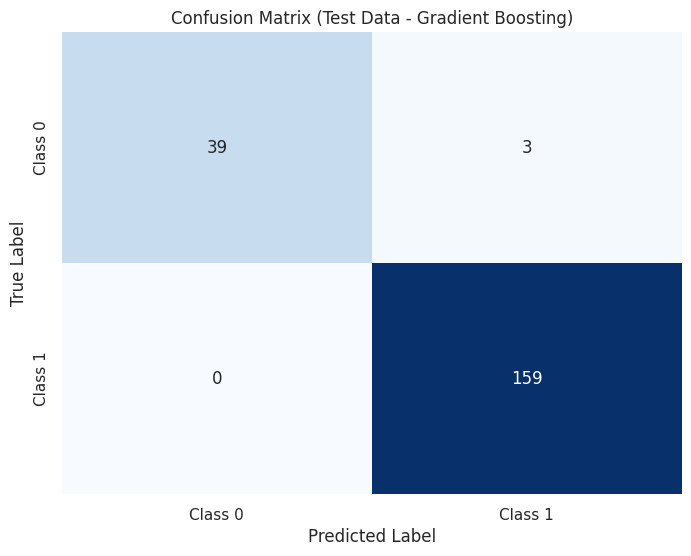

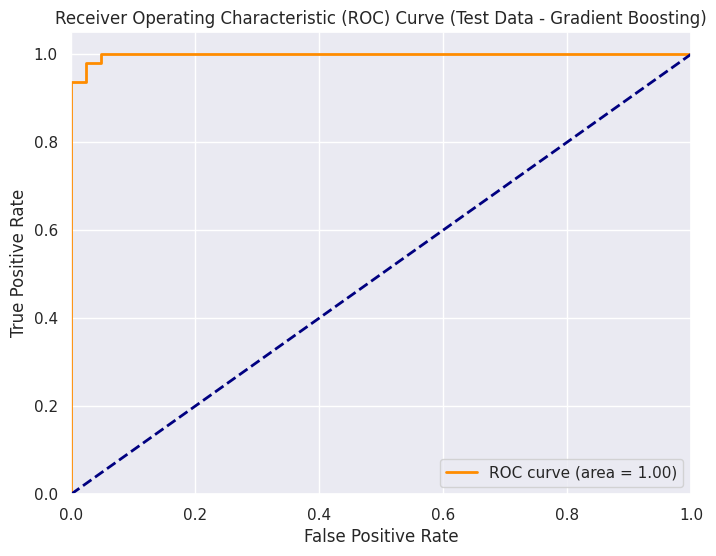

In [ ]:
#  trained Gradient Boosting model is used to make predictions on  test set.
ypredgbtest = gbclassifier.predict(Xtestclassanomoly)

# Print a title for  section on test assessment.
print("\nGradient Boosting Classifier Evaluation:")

# defined how accurately  test predictions were predicted.
accuracy_test = accuracy_score(ytestclassanomoly, ypredgbtest)

# defined  precision score for  test set by calculating  number of correctly anticipated positives.
precisiontest = precision_score(ytestclassanomoly, ypredgbtest)

# defined  recall score by calculating  number of properly predicted real positives on  test set.
recalltest = recall_score(ytestclassanomoly, ypredgbtest)

# defined  test set's F1 score by taking  harmonic mean of accuracy and recall.
f1test = f1_score(ytestclassanomoly, ypredgbtest)

# Output  precision score for  test set that was definedd.
print("Test Precision:", precisiontest)

#  computed recall score for  test set should be printed.
print("Test Recall:", recalltest)

# Print  F1 score that was definedd for  test set.
print("Test F1 Score:", f1test)

# Output  test set's accuracy percentage.
print("Accuracy:", accuracy_test)

# Include precision, recall, F1, and support in  whole classification report that is printed for  test set.
print("\nClassification Report:")
print(classification_report(ytestclassanomoly, ypredgbtest))

# For safety, make anor class label prediction on  test set.
ypredgbtest = gbclassifier.predict(Xtestclassanomoly)

# Forecast  test set's class probabilities for ROC curve visualisation.
y_proba_gb_test = gbclassifier.predict_proba(Xtestclassanomoly)[:, 1]  # Probabilities for  positive class

# Confusion matrix for test predictions should be created.
cm_test = confusion_matrix(ytestclassanomoly, ypredgbtest)

# Create a heatmap for  test data using  confusion matrix.
pltx.figure(figsize=(8, 6))
sbn.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Put  expected classes on  x axis.
pltx.xlabel('Predicted Label')

# Indicate real classes on  y axis.
pltx.ylabel('True Label')

# Put  test confusion matrix plot's title in place.
pltx.title('Confusion Matrix (Test Data - Gradient Boosting)')

# Show  matrix plot of misunderstanding
pltx.show()
print('\n')

# defined  test data's False Positive Rate and True Positive Rate for  ROC curve.
fpr_test, tpr_test, _ = roc_curve(ytestclassanomoly, y_proba_gb_test)

# For  test ROC, calculate  Area Under  Curve (AUC).
roc_auc_test = auc(fpr_test, tpr_test)

# Create a ROC curve plot for  test set.
pltx.figure(figsize=(8, 6))
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')

# In order to symbolise random prediction, add a diagonal reference line.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Give  ROC plot's x axis bounds.
pltx.xlim([0.0, 1.0])

# Assign limitations to  ROC plot's y axis.
pltx.ylim([0.0, 1.05])

# Put  ROC curve's x axis label.
pltx.xlabel('False Positive Rate')

# Put  ROC curve's y axis label.
pltx.ylabel('True Positive Rate')

# Assign  test ROC curve plot's title.
pltx.title('Receiver Operating Characteristic (ROC) Curve (Test Data - Gradient Boosting)')

# Incorporate a legend that shows  ROC AUC value.
pltx.legend(loc="lower right")

# Show  ROC curve graphic.
pltx.show()

# **XGboost model**


XGBoost Classifier Evaluation (Training Data):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       679

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



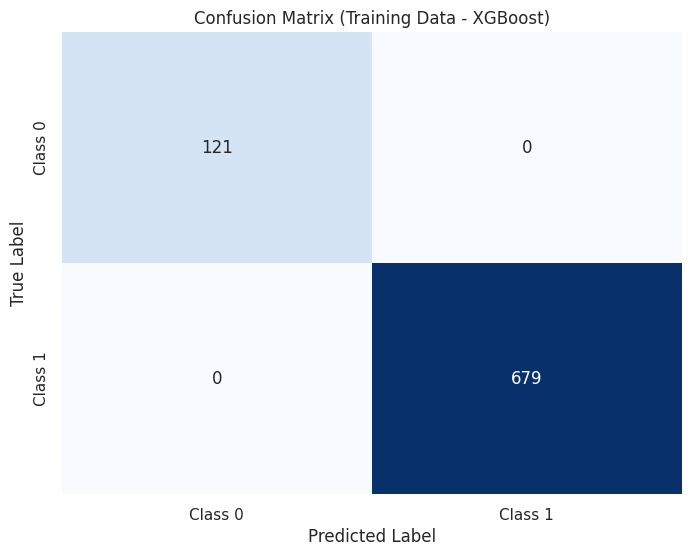

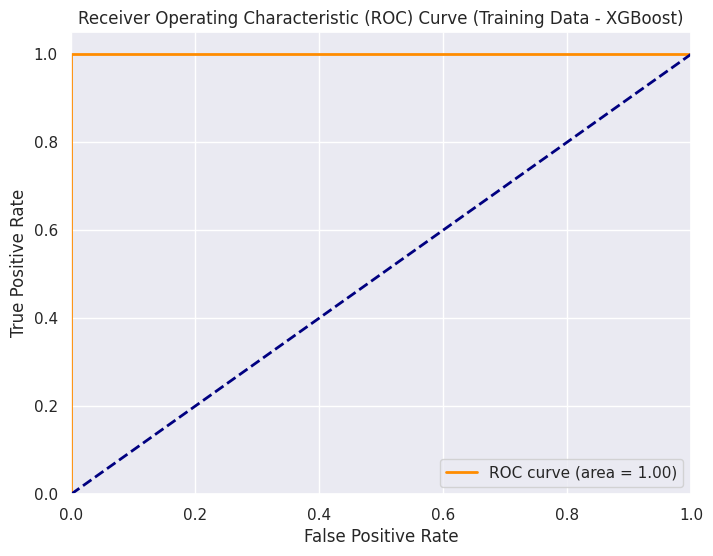




XGBoost Classifier Evaluation (Test Data):
Accuracy: 0.9850746268656716
Precision: 0.9814814814814815
Recall: 1.0
F1 Score: 0.9906542056074767

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.98      1.00      0.99       159

    accuracy                           0.99       201
   macro avg       0.99      0.96      0.98       201
weighted avg       0.99      0.99      0.98       201



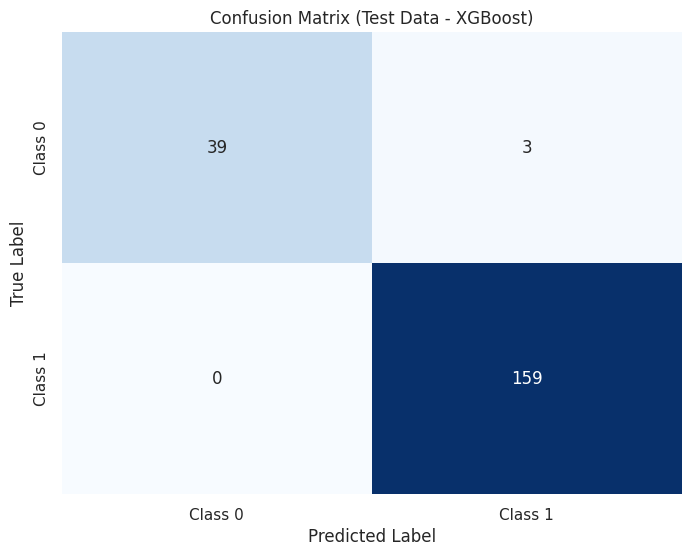

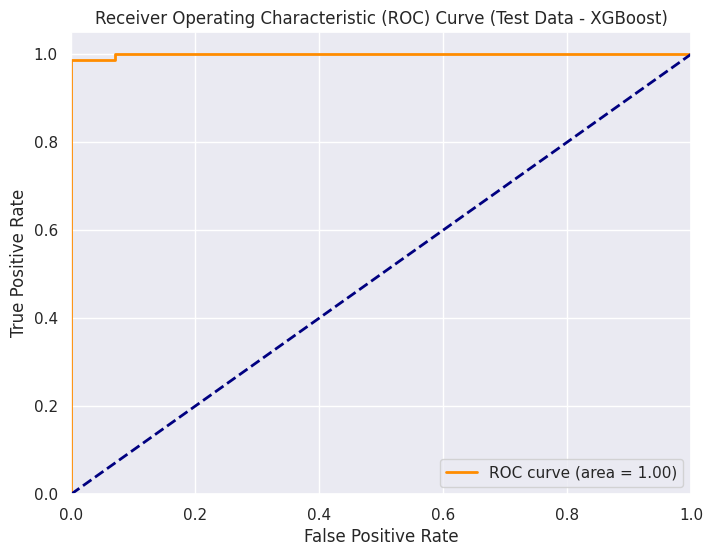

In [ ]:
# Set the evaluation metric, random seed, and binary logistic objective to the XGBoost classifier's initial values.
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Utilise the training dataset to train the XGBoost model.
xgb_classifier.fit(Xtrainclassanomoly, ytrainclassanomoly)

# Use the learnt XGBoost model to forecast class labels for the training dataset.
y_pred_xgb_train = xgb_classifier.predict(Xtrainclassanomoly)

# Using the training dataset, predict the positive class's probability scores.
y_proba_xgb_train = xgb_classifier.predict_proba(Xtrainclassanomoly)[:, 1]

# Print the training evaluation results heading.
print("\nXGBoost Classifier Evaluation (Training Data):")

# Use the training dataset to calculate and print accuracy.
print("Accuracy:", accuracy_score(ytrainclassanomoly, y_pred_xgb_train))

# Use the training dataset to calculate and print precision.
print("Precision:", precision_score(ytrainclassanomoly, y_pred_xgb_train))

# Use the training dataset to calculate and print recall.
print("Recall:", recall_score(ytrainclassanomoly, y_pred_xgb_train))

# Using the training dataset, compute and output the F1-score.
print("F1 Score:", f1_score(ytrainclassanomoly, y_pred_xgb_train))

# To train predictions, print a comprehensive categorisation report.
print("\nClassification Report (Training Data):")
print(classification_report(ytrainclassanomoly, y_pred_xgb_train))

# Create the training data's confusion matrix.
cm_xgb_train = confusion_matrix(ytrainclassanomoly, y_pred_xgb_train)

# Plot training data in a confusion matrix heatmap.
pltx.figure(figsize=(8, 6))
sbn.heatmap(cm_xgb_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Set the confusion matrix plot's title.
pltx.title('Confusion Matrix (Training Data - XGBoost)')

# Give the confusion matrix's xaxis a label.
pltx.xlabel('Predicted Label')

# Give the confusion matrix's yaxis a label.
pltx.ylabel('True Label')

# Display the plot of the confusion matrix.
pltx.show()

# Print a newline to add visual distance
print('\n')

# Determine the thresholds for the training ROC curve as well as the false positive and true positive rates.
fpr_xgb_train, tpr_xgb_train, _ = roc_curve(ytrainclassanomoly, y_proba_xgb_train)

# Determine training ROC's Area Under Curve (AUC).
roc_auc_xgb_train = auc(fpr_xgb_train, tpr_xgb_train)

# Construct the ROC curve plot figure.
pltx.figure(figsize=(8, 6))

# Create a training data ROC curve.
pltx.plot(fpr_xgb_train, tpr_xgb_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_train:.2f})')

# Plot the baseline diagonal (the reference for the random classifier).
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Assign ROC plot xaxis bounds.
pltx.xlim([0.0, 1.0])

# Establish yaxis bounds for the ROC chart.
pltx.ylim([0.0, 1.05])

# Label the ROC plot's xaxis.
pltx.xlabel('False Positive Rate')

# Label the ROC plot's yaxis.
pltx.ylabel('True Positive Rate')

# Create a title for the training ROC curve display.
pltx.title('Receiver Operating Characteristic (ROC) Curve (Training Data - XGBoost)')

# Show the ROC curve plot's legend.
pltx.legend(loc="lower right")

# Present the training data's ROC curve representation.
pltx.show()

# Print a newline to add visual distance.
print('\n')

# Use the learnt XGBoost model to forecast class labels for the test dataset.
y_pred_xgb_test = xgb_classifier.predict(Xtestclassanomoly)

# Using the test dataset, forecast probability scores for the positive class.
y_proba_xgb_test = xgb_classifier.predict_proba(Xtestclassanomoly)[:, 1]

# Print the test assessment findings' heading.
print("\nXGBoost Classifier Evaluation (Test Data):")

# Determine and record accuracy using the test dataset.
accuracy_test_xgb = accuracy_score(ytestclassanomoly, y_pred_xgb_test)

# Use the test dataset to compute and save precision.
precision_test_xgb = precision_score(ytestclassanomoly, y_pred_xgb_test)

# Determine and record recall using the test dataset.
recall_test_xgb = recall_score(ytestclassanomoly, y_pred_xgb_test)

# Compute and save the test dataset's F1-score.
f1_test_xgb = f1_score(ytestclassanomoly, y_pred_xgb_test)

# Print accuracy for the dataset under test.
print("Accuracy:", accuracy_test_xgb)

# Print the test dataset precision.
print("Precision:", precision_test_xgb)

# Output the test dataset's recall.
print("Recall:", recall_test_xgb)

# Output the test dataset's F1-score.
print("F1 Score:", f1_test_xgb)

# Print a thorough categorisation report for test forecasts.
print("\nClassification Report (Test Data):")
print(classification_report(ytestclassanomoly, y_pred_xgb_test))

# Create a confusion matrix for the test data.
cm_xgb_test = confusion_matrix(ytestclassanomoly, y_pred_xgb_test)

# Create a confusion matrix heatmap using test data.
pltx.figure(figsize=(8, 6))
sbn.heatmap(cm_xgb_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Set the test confusion matrix plot's title.
pltx.title('Confusion Matrix (Test Data - XGBoost)')

# Set the test confusion matrix's xaxis label.
pltx.xlabel('Predicted Label')

# Set the test confusion matrix's yaxis label.
pltx.ylabel('True Label')

# Present test data's confusion matrix graphic.
pltx.show()

# To create visible space, print a newline.
print('\n')

# Determine the test ROC curve's false positive rate, true positive rate, and thresholds.
fpr_xgb_test, tpr_xgb_test, _ = roc_curve(ytestclassanomoly, y_proba_xgb_test)

# Figure out the test ROC's Area Under Curve (AUC).
roc_auc_xgb_test = auc(fpr_xgb_test, tpr_xgb_test)

# Produce a ROC curve plot (test) figure.
pltx.figure(figsize=(8, 6))

# For test data, plot the ROC curve.
pltx.plot(fpr_xgb_test, tpr_xgb_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_test:.2f})')

# For the random classifier reference, plot the baseline diagonal.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# For the test ROC figure, set the xaxis limits.
pltx.xlim([0.0, 1.0])

# For the test ROC figure, set the yaxis limitations.
pltx.ylim([0.0, 1.05])

# Label the xaxis in the test ROC plot.
pltx.xlabel('False Positive Rate')

# Label the yaxis in the test ROC plot.
pltx.ylabel('True Positive Rate')

# Assign the ROC curve plot (test) a title.
pltx.title('Receiver Operating Characteristic (ROC) Curve (Test Data - XGBoost)')

# Plot the legend for the ROC curve.
pltx.legend(loc="lower right")

# Present the test data ROC curve diagram.
pltx.show()


# **Comparision model**

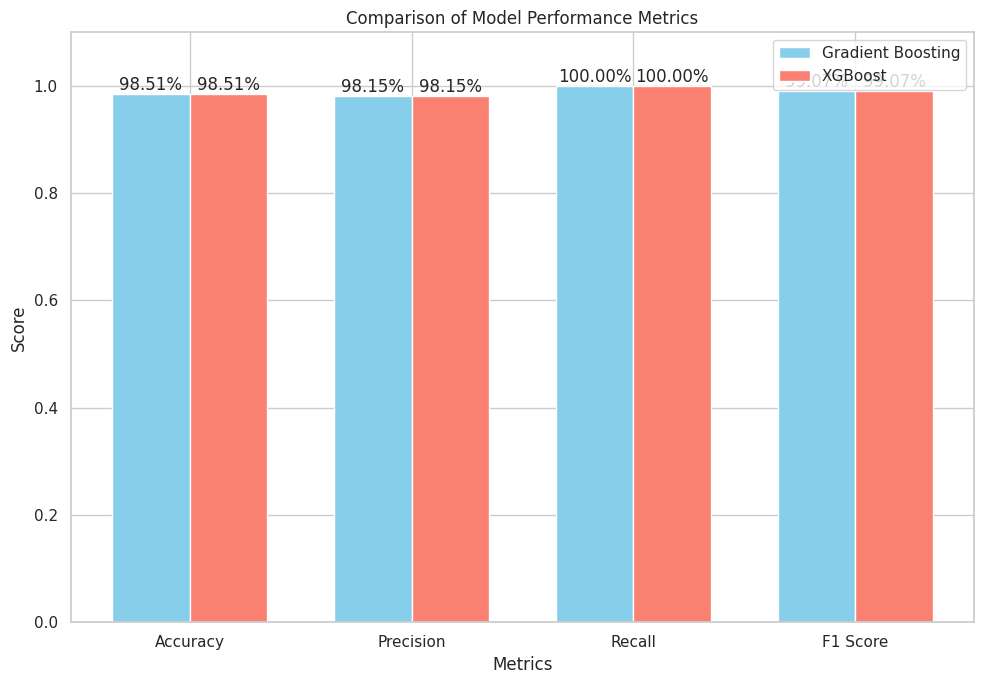

In [ ]:
# Specify the evaluation metrics that will be shown on the x-axis.
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Performance results for the Store Gradient Boosting model.
gb_scores = [accuracy_test, precisiontest, recalltest, f1test]

# Save the performance scores of the XGBoost model.
xgb_scores = [accuracy_test_xgb, precision_test_xgb, recall_test_xgb, f1_test_xgb]

# Configure each bar's width in the bar chart.
bar_width = 0.35

# Assign the number of metrics to an array of indices.
index = npx.arange(len(metrics))

# Configure the plot's figure size.
pltx.figure(figsize=(10, 7))

# Construct the Gradient Boosting model scores bar chart.
bar1 = pltx.bar(index, gb_scores, bar_width, label='Gradient Boosting', color='skyblue')

# Make a bar chart with the XGBoost model scores offset by the bar width.
bar2 = pltx.bar(index + bar_width, xgb_scores, bar_width, label='XGBoost', color='salmon')

# Set the chart's x-axis label.
pltx.xlabel('Metrics')

# Assign the chart's y-axis label.
pltx.ylabel('Score')

# Modify the bar chart's title.
pltx.title('Comparison of Model Performance Metrics')

# Define the x-axis ticks' positions and labels.
pltx.xticks(index + bar_width / 2, metrics)

# To distinguish between the models, add a legend.
pltx.legend()

# Create a function to label each bar with a percentage.
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        pltx.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')  # Format as percentage

# Apply the labeling function to both sets of bars.
add_labels(bar1)
add_labels(bar2)

# Set the y-axis limit slightly above 1 for label clarity.
pltx.ylim(0, 1.1)

# Optimize spacing and layout.
pltx.tight_layout()

# Display the completed plot.
pltx.show()

# **Shap plot**

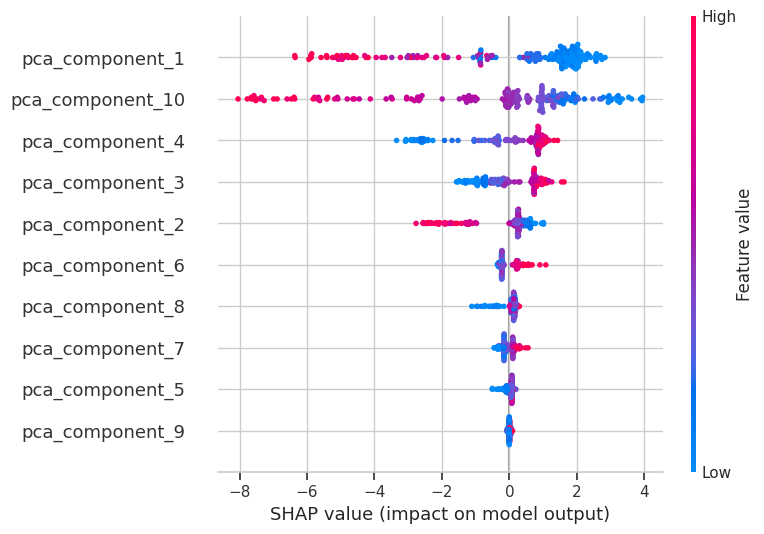

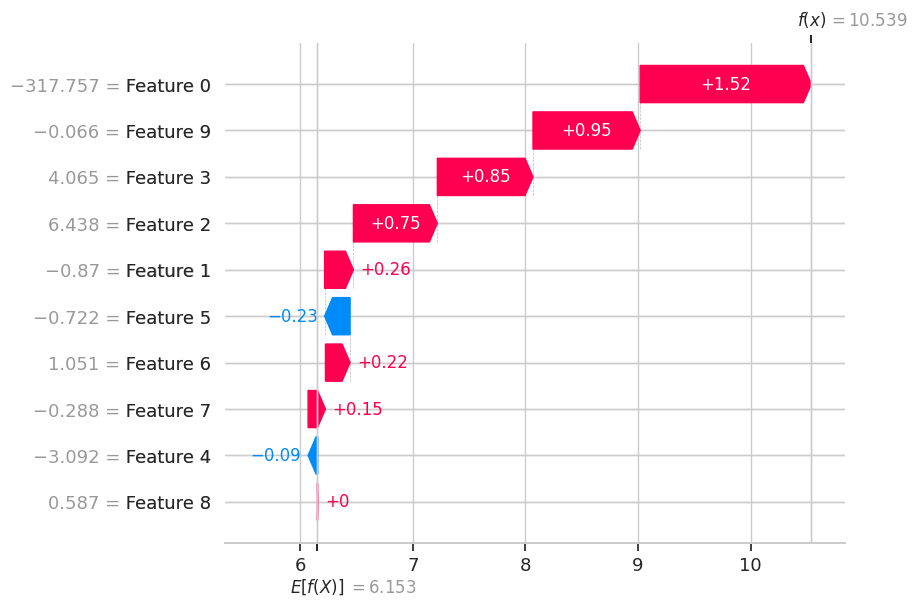

In [ ]:
# Set up the SHAP explainer with the training data and the trained XGBoost model.
explainer = shap.Explainer(xgb_classifier, Xtrainclassanomoly)

# Determine the SHAP values for the test dataset.
shap_values = explainer(Xtestclassanomoly)

# Use the names of the PCA components to create a summary plot that illustrates the importance and impact of features.
shap.summary_plot(shap_values, Xtestclassanomoly, feature_names=[f'pca_component_{i+1}' for i in range(Xtestclassanomoly.shape[1])])

# Add spacing to the output to make it easier to read.
print('\n')

# Create a waterfall plot that explains the prediction for a particular test instance (make sure instance_index is defined).
instance_index = 0  # Replace with any valid index if needed
shap.plots.waterfall(shap_values[instance_index])